In [118]:
from keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from skimage.io import imread
from skimage.transform import resize

path = 'data/128x128'
classes = next(os.walk(path))[1]
images = []
labels = []
for label, class_name in enumerate(classes):
    files = next(os.walk(join(path, class_name)))[2]
    for file in files:
        filename = join(path, class_name, file)
        try:
            img = image.load_img(filename)
            img_arr = image.img_to_array(img)
        except:
            pass

        if not img_arr.shape == (IMG_SIZE, IMG_SIZE, 3):
            print("Unexpected shape")
            continue

        images.append(img_arr)
        labels.append(label)    

print("Loaded %d images" % len(images))

Loaded 1206 images


151.061 -123.68


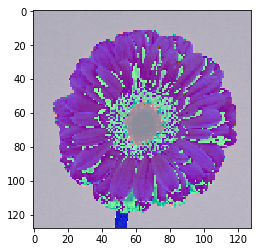

In [139]:
import matplotlib.pyplot as plt
import PIL
from keras.applications.resnet50 import preprocess_input

x = preprocess_input(images)

print(np.max(images), np.min(images))
img_data = np.uint8(images[7])
#img_data[:,:,0] = 0
#img_data[:,:,1] = 0
plt.imshow(img_data)

img = PIL.Image.fromarray(img_data)
img.save('test.png', 'PNG')


In [117]:
import random
#from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import preprocess_input

# shuffle all samples
samples = list(zip(images,labels))
random.shuffle(samples)
x,y = zip(*samples)

# make numpy arrays
x = np.array(x)
y = np.array(y)

# one hot encoding of labels
y = keras.utils.to_categorical(y)

# perform preprocessing for vgg16
x = preprocess_input(x)

# check shapes
print(x.shape, y.shape)

# split test / train set
split = 100
train_size = 200
test_x = x[:split]
test_y = y[:split]
train_x = x[split:split + train_size]
train_y = y[split:split + train_size]

(1206, 128, 128, 3) (1206, 2)


In [115]:
import keras
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape = (IMG_SIZE, IMG_SIZE, 3))
#base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x = train_x, y = train_y, batch_size = 8, validation_split = 0.1, epochs = 10, verbose=1)

model.evaluate(test_x, test_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 514       
Total params: 14,846,530
Trainable params: 131,842
Non-trainable params: 14,714,688
_________________________________________________________________
Train on 180 samples, validate on 20 samples
Epoch 1/10
180/180 [==============================] - 31s 170ms/step - loss: 1.

KeyboardInterrupt: 

In [195]:
import redis, json

r = redis.StrictRedis(host='localhost', port=6379)
r.publish('labels', json.dumps({'test': 22}))

r.lpush('list', .2)
a = r.lrange('list', 0, 5)
np.mean(np.array(a).astype('float'))

# r.set('yes', 'no')
# r.get('yes')

# p = r.pubsub(ignore_subscribe_messages=False)
# p.subscribe('my-channel')

# r.publish('my-channel', ['ss','dsda'])
# p.get_message()

# msg = p.get_message()
# msg['data']



0.19999999999999998